In [74]:
import numpy as np 
import matplotlib.pyplot as plt 

def fd_1(omega, T): return -1/(4*T)/np.cosh(omega/(2*T))**2


epsilon = 8.5
t1x, t1y = 3., 3.
t2x, t2y = 1., 1.

phys_parameters = [epsilon, t1x, t1y, t2x, t2y]

a, b = 1., 1.
pos = np.array([[0.,0.], [a/2, b/2]])

Ny, Nx = 100, 100

T = 1/100
eps = 1e-6
omega_max = np.sqrt(np.abs(np.arccosh(1/(eps*4*T))) * 2 * T)

occ_target = 0.508
mu = 4.5750174621019815
E_c = 4.5

omegas = np.linspace(-0.5,0.5,1201)

Gamma = 0.03
phiB = np.load('phi_Boltzmann.npy') / (2*Gamma) / (Ny*Nx)  #/ (2*np.pi)**2
phiK = np.load('phi_Kubo.npy') * np.pi / (Ny*Nx)  #/ (2*np.pi)**2

(0.3979799970579758, 1.015496609496618)

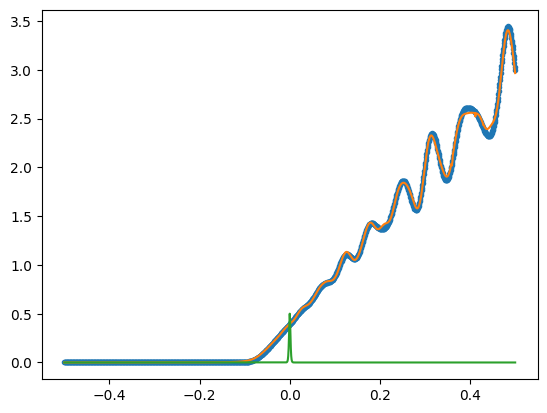

In [77]:
T = 1/1000

plt.plot(omegas, phiB[0], '.-')
plt.plot(omegas, phiK[0].real)

sigma = np.sum(phiB[0].real * (-fd_1(omegas, T))) * (omegas[1] - omegas[0])
plt.plot(omegas, -fd_1(omegas, T) / 500)

m2x = 1/(2*t2x)
tau = 1/(2*Gamma)
n = m2x/np.pi * T * np.log(1 + np.exp((mu - E_c)/T))
sigma_ = n * tau / m2x

sigma_, sigma_/sigma